# EDA - Análisis exploratorio.
Genera data_df.csv para que lo levante ML.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Lectura del dataset generado en el proceso de ETL.
# El dataset en Python lo voy a manejar en un dataframe de Pandas.
df = pd.read_csv('C:\\Trabajo\\Procesos\\tfi\\dataset.csv', sep=';', low_memory=False, encoding='latin1')

In [6]:
# Filas y columnas del dataframe.
df.shape 

(469370, 25)

In [7]:
# Muestro 5 primeros registros del dataframe para realizar un análisis superficial del mismo.
pd.options.display.max_columns=None
df.head(5)

,pol,endoso,item,fecemi,tipend,idaseg,ase_antig_an,ase_cp,ase_prof,ase_codnac,ase_nac,idprod,pro_antig_an,tipveh,marca,modelo,anio,uso,uso_desc,cober,codcober,cober_desc,cob_fecuma,cob_ef,fraude
0,200000,0,1,1/1/2018,EMISION,4508,6,1640,NaN,200.0,ARGENTINA,1521,11,3,2,7,1992,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,1/1/2018,NaN,0
1,200001,0,1,1/1/2018,EMISION,5350,6,1678,NaN,205.0,COLOMBIA,5001,6,1,2,7,2000,1,PARTICULAR,B,2,RC INC ROBO HURTO,19/2/2018,NaN,0
2,200001,1,1,31/1/2018,ENDOSO DATOS GENERALES,5350,6,1678,NaN,205.0,COLOMBIA,5001,6,1,2,7,2000,1,PARTICULAR,D1,40,TODO RIESGO-FRANQ,NaN,NaN,0
3,200001,2,1,31/5/2018,ENDOSO CAMBIO COBERTURA,5350,6,1678,NaN,205.0,COLOMBIA,5001,6,1,2,7,2000,1,PARTICULAR,D2,41,TODO RIESGO-FRANQ EVEN,NaN,NaN,0
4,200004,0,1,1/1/2018,EMISION,7618,3,1406,NaN,205.0,COLOMBIA,1527,11,1,2,7,2018,3,ALQUILER,D4,43,TODO RIESGO SIN FRANQUICIA,7/2/2018,NaN,1


In [8]:
# Muestro diseño del dataframe, nombre de columnas, cuenta de NA y tipo de dato.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469370 entries, 0 to 469369
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pol           469370 non-null  int64  
 1   endoso        469370 non-null  int64  
 2   item          469370 non-null  int64  
 3   fecemi        469370 non-null  object 
 4   tipend        469370 non-null  object 
 5   idaseg        469370 non-null  int64  
 6   ase_antig_an  469370 non-null  int64  
 7   ase_cp        469370 non-null  int64  
 8   ase_prof      0 non-null       float64
 9   ase_codnac    351480 non-null  float64
 10  ase_nac       351480 non-null  object 
 11  idprod        469370 non-null  int64  
 12  pro_antig_an  469370 non-null  int64  
 13  tipveh        469370 non-null  int64  
 14  marca         469370 non-null  int64  
 15  modelo        469370 non-null  int64  
 16  anio          469370 non-null  int64  
 17  uso           469370 non-null  int64  
 18  uso_

In [9]:
 # Descripción del dataset de entrada.
 
 # Column        Description 
 # ------        -----------
 # pol           Número de póliza. 
 # endoso        Número de endoso a póliza. 
 # item          Identificador del Vehículo dentro de la Póliza.
 # tipend        Tipo de Endoso.
 # idaseg        ID del Asegurado.
 # ase_antig_an  Antiguedad del Asegurado. Viene medida en años del proceso de ETL. 
 # ase_cp        CP del domicilio del Asegurado 
 # ase_prof      Profesión del Asegurado
 # ase_codnac    Código de Pais de la Nacionalidad del Asegurado
 # ase_nac       Nacionalidad del Asegurado
 # idprod        ID del Productor 
 # pro_antig_an  Antiguedad del Productor. Viene medida en años del proceso de ETL.
 # tipveh        Tipo de Vehículo 
 # marca         Marca del Vehículo 
 # modelo        Modelo del Vehículo 
 # anio          Año de Fabricación del Vehículo 
 # uso           Uso del Vehículo 
 # uso_desc      Descripción
 # cober         Cobertura del Seguro
 # codcober      Código de Cobertura del Seguro
 # cober_desc    Descripción de la Cobertura
 # cob_fecuma    Fecha de la última Cobranza
 # cob_ef        Tiene Cobranza en Efectivo (S/N)
 # fraude        Variable Objetivo. La póliza tuvo siniestros considerados como fraude por Experto (0/1).

In [10]:
# Otra forma de ver las columnas del dataframe.
df.columns

Index(['pol', 'endoso', 'item', 'fecemi', 'tipend', 'idaseg', 'ase_antig_an',
       'ase_cp', 'ase_prof', 'ase_codnac', 'ase_nac', 'idprod', 'pro_antig_an',
       'tipveh', 'marca', 'modelo', 'anio', 'uso', 'uso_desc', 'cober',
       'codcober', 'cober_desc', 'cob_fecuma', 'cob_ef', 'fraude'],
      dtype='object')

In [11]:
# Chequeo de valores faltantes en el dataframe.
df.isnull()

,pol,endoso,item,fecemi,tipend,idaseg,ase_antig_an,ase_cp,ase_prof,ase_codnac,ase_nac,idprod,pro_antig_an,tipveh,marca,modelo,anio,uso,uso_desc,cober,codcober,cober_desc,cob_fecuma,cob_ef,fraude
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469365,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
469366,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
469367,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
469368,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# Chequeo de valores faltantes en el dataframe.
df.isnull().sum() # True == 1 y False == 0

pol                  0
endoso               0
item                 0
fecemi               0
tipend               0
idaseg               0
ase_antig_an         0
ase_cp               0
ase_prof        469370
ase_codnac      117890
ase_nac         117890
idprod               0
pro_antig_an         0
tipveh               0
marca                0
modelo               0
anio                 0
uso                  0
uso_desc             0
cober                0
codcober             0
cober_desc           0
cob_fecuma       17757
cob_ef          262146
fraude               0
dtype: int64

In [13]:
# 'ase_prof'   tiene NA en todos los registros, no la tendremos en cuenta para el proceso, así que se elimina del df.
# 'ase_codnac' idem 'ase_nac'
# 'ase_nac'    tiene NA en un 25% de los registro, consultada la parte comercial operativa
#              de la Aseguradora, nos indican que cuando no tienen la nacionalidad se asume 'Argentina', código '200'.
# 'cob_fecuma' tiene valores NA y es razonable que así sea, son operaciones que aún no tuvieron cobranza.
# 'cob_ef'     es una variable categórica ('S'/'N'), por lo analizado de sus valores, cuando es 'S'
#              tiene ese valor, pero cuando es 'N' tiene NA. Deberemos arreglar el contenido de la variable.

In [14]:
# formas de resolver los registros con variables en nulo.
# para una variable continua podría encontrar el valor modal y usarlo para rellenar.
# xvar_mode = df.xvar.mode()[0]
# df.xvar.fillna(xvar_mode, inplace = True)
# df.xvar.isnull().sum()

In [15]:
# para el caso de las columnas 'cob_ef' y 'ase_nac'/'ase_codnac'
df.cob_ef.fillna('N', inplace=True)
df.ase_nac.fillna('ARGENTINA', inplace=True)
df.ase_codnac.fillna(200, inplace=True)

In [16]:
# Chequeo de valores faltantes en el dataframe.
df.isnull().sum() # True == 1 y False == 0

pol                  0
endoso               0
item                 0
fecemi               0
tipend               0
idaseg               0
ase_antig_an         0
ase_cp               0
ase_prof        469370
ase_codnac           0
ase_nac              0
idprod               0
pro_antig_an         0
tipveh               0
marca                0
modelo               0
anio                 0
uso                  0
uso_desc             0
cober                0
codcober             0
cober_desc           0
cob_fecuma       17757
cob_ef               0
fraude               0
dtype: int64

In [17]:
# para la columna 'ase_prof', la decisión es eliminarla del dataframe.
if 'ase_prof' in df.columns:
    del df['ase_prof']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469370 entries, 0 to 469369
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pol           469370 non-null  int64  
 1   endoso        469370 non-null  int64  
 2   item          469370 non-null  int64  
 3   fecemi        469370 non-null  object 
 4   tipend        469370 non-null  object 
 5   idaseg        469370 non-null  int64  
 6   ase_antig_an  469370 non-null  int64  
 7   ase_cp        469370 non-null  int64  
 8   ase_codnac    469370 non-null  float64
 9   ase_nac       469370 non-null  object 
 10  idprod        469370 non-null  int64  
 11  pro_antig_an  469370 non-null  int64  
 12  tipveh        469370 non-null  int64  
 13  marca         469370 non-null  int64  
 14  modelo        469370 non-null  int64  
 15  anio          469370 non-null  int64  
 16  uso           469370 non-null  int64  
 17  uso_desc      469370 non-null  object 
 18  cobe

## Análisis exploratorio univariable.

In [19]:
# Utilizo primero el método describe del df entero para mostrar las estadísticas descriptivas incluyendo: 
# media, meadiana, máx, mín, std, etc. El método describe solo regresa los valores de estas estadísticas 
# para las columnas numéricas (Ssalvo que se instruya al método con el argumento "include='all'").
print(df.describe())

                 pol         endoso           item        idaseg  \
count  469370.000000  469370.000000  469370.000000  4.693700e+05   
mean   434654.229388       0.001300       1.012576  1.155120e+07   
std    135460.995433       0.075156       0.309774  1.046871e+07   
min    200000.000000       0.000000       1.000000  2.000000e+00   
25%    317344.250000       0.000000       1.000000  4.772250e+05   
50%    434686.500000       0.000000       1.000000  1.515232e+07   
75%    551941.750000       0.000000       1.000000  1.536369e+07   
max    669277.000000       8.000000      45.000000  3.597326e+07   

        ase_antig_an         ase_cp     ase_codnac         idprod  \
count  469370.000000  469370.000000  469370.000000  469370.000000   
mean        3.022564    1523.887046     200.028257    2233.585542   
std         1.736485    1095.782110       0.569121    1389.886033   
min         0.000000    1001.000000     200.000000       1.000000   
25%         2.000000    1001.000000     20

## Algunas variables de interés para analizar.

### Variable 'item'

<AxesSubplot:title={'center':'Item'}>

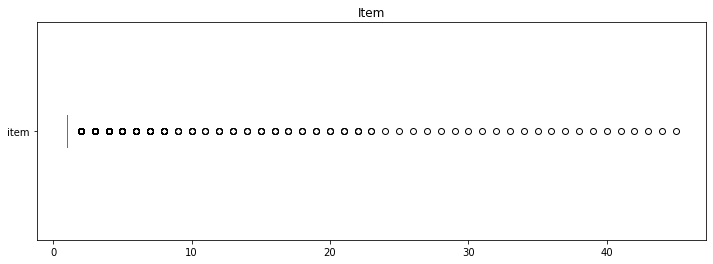

In [20]:
df['item'].plot(title='Item', kind='box', vert=False, figsize=[12, 4])

In [21]:
# Busco el valor Modal para entender los outliers.
df['item'].mode()[0]

1

In [22]:
# Se detectan valores atípicos (outliers) superiores.
# Filtrar para verlos y determinar que son, si son válidos y como tratarlos.
filtro=df['item']>1
df[filtro].sort_values(by='item', ascending=False)

,pol,endoso,item,fecemi,tipend,idaseg,ase_antig_an,ase_cp,ase_codnac,ase_nac,idprod,pro_antig_an,tipveh,marca,modelo,anio,uso,uso_desc,cober,codcober,cober_desc,cob_fecuma,cob_ef,fraude
323607,523522,0,45,9/9/2018,EMISION,15131205,4,1646,200.0,ARGENTINA,1875,11,3,61,745,1990,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,NaN,N,1
323606,523522,0,44,9/9/2018,EMISION,15131205,4,1646,200.0,ARGENTINA,1875,11,3,26,304,1990,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,NaN,N,0
323605,523522,0,43,9/9/2018,EMISION,15131205,4,1646,200.0,ARGENTINA,1875,11,3,25,266,1990,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,NaN,N,0
323604,523522,0,42,9/9/2018,EMISION,15131205,4,1646,200.0,ARGENTINA,1875,11,3,26,317,1990,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,NaN,N,0
323603,523522,0,41,9/9/2018,EMISION,15131205,4,1646,200.0,ARGENTINA,1875,11,3,7,74,1990,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,NaN,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179828,379830,0,2,19/5/2018,EMISION,15168524,2,1001,200.0,ARGENTINA,1762,11,1,26,309,2000,1,PARTICULAR,A,1,RC,29/6/2018,S,0
180025,380027,0,2,19/5/2018,EMISION,15330890,2,1001,200.0,ARGENTINA,1104,11,3,38,404,1991,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,8/7/2018,N,0
180435,380437,0,2,20/5/2018,EMISION,73848,2,1001,200.0,ARGENTINA,1255,11,1,50,530,2004,1,PARTICULAR,A,1,RC,NaN,N,0
180577,380579,0,2,20/5/2018,EMISION,235795,6,1646,200.0,ARGENTINA,5005,6,1,7,74,1999,1,PARTICULAR,A,1,RC,20/5/2018,N,0


In [23]:
# Reviso la frecuencia de cada valor.
df.groupby('item')['item'].count()

item
1     465994
2       2580
3        494
4        136
5         44
6         21
7         18
8         10
9          4
10         5
11         3
12         4
13         4
14         3
15         4
16         4
17         3
18         3
19         3
20         3
21         3
22         3
23         2
24         1
25         1
26         1
27         1
28         1
29         1
30         1
31         1
32         1
33         1
34         1
35         1
36         1
37         1
38         1
39         1
40         1
41         1
42         1
43         1
44         1
45         1
Name: item, dtype: int64

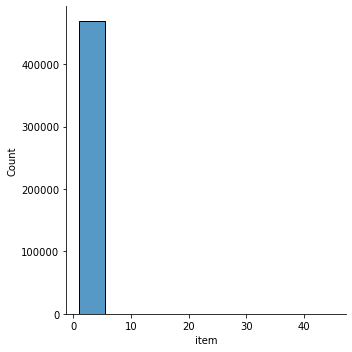

In [24]:
# Plot de Distribución.
sns.displot(df['item'], bins=10)

In [25]:
# Se comprueba que la mayoría de las operaciones son individuales (de un solo vehículo).
# Se verifica también que la operación que tiene 45 items es una póliza flota. Lo mismo las demás que tienen 
# más de un item. Se dejan los registros intactos.

### Variable 'ase_antig_an'

In [26]:
df['ase_antig_an'].describe()

count    469370.000000
mean          3.022564
std           1.736485
min           0.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          32.000000
Name: ase_antig_an, dtype: float64

<AxesSubplot:title={'center':'Antiguedad del Asegurado en Años'}>

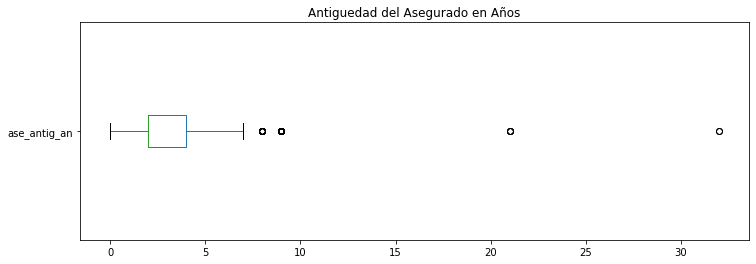

In [27]:
df['ase_antig_an'].plot(title='Antiguedad del Asegurado en Años', kind='box', vert=False, figsize=[12, 4])

In [28]:
# Se detectan valores atípicos (outliers) superiores.
# Filtrar para verlos y determinar que son, si son válidos o si es necesario eliminar las filas.
filtro=df['ase_antig_an']>=15
df[filtro]

,pol,endoso,item,fecemi,tipend,idaseg,ase_antig_an,ase_cp,ase_codnac,ase_nac,idprod,pro_antig_an,tipveh,marca,modelo,anio,uso,uso_desc,cober,codcober,cober_desc,cob_fecuma,cob_ef,fraude
44010,244012,0,1,4/2/2018,EMISION,35957109,21,1646,200.0,ARGENTINA,1428,4,3,25,298,1997,1,PARTICULAR,C1,31,TERCEROS COMPLETO + PARCIAL,20/3/2018,N,0
59155,259157,0,1,16/2/2018,EMISION,35880056,32,1619,200.0,ARGENTINA,2001,11,3,26,304,1994,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,23/3/2018,N,0
60350,260352,0,1,17/2/2018,EMISION,35880056,32,1619,200.0,ARGENTINA,1103,11,1,25,270,2003,1,PARTICULAR,B,2,RC INC ROBO HURTO,12/4/2018,S,0
172804,372806,0,1,13/5/2018,EMISION,35957109,21,1646,200.0,ARGENTINA,1476,11,1,26,326,2002,1,PARTICULAR,B,2,RC INC ROBO HURTO,NaN,N,0
228095,428097,0,1,26/6/2018,EMISION,15357066,21,1605,200.0,ARGENTINA,1361,6,3,61,772,1994,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,22/8/2018,S,0
380678,580593,0,1,23/10/2018,EMISION,15357066,21,1605,200.0,ARGENTINA,2013,11,3,56,617,1992,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,13/12/2018,N,0


In [29]:
# Se comprueba que corresponden a 3 clientes.
# Códigos 35957109, 35880056 y 15357066. Se verifica con el área Comercial de la Aseguradora y la antiguedad de
# los Asegurados es correcta. Se dejan los registros intactos.

# Otra forma de encontrar los outliers superiores:
# df['ase_antig_an'].nlargest(10)
# df.nlargest(10, 'ase_antig_an') # 10 registros con Asegurados de mayor antiguedad.
# df['ase_antig_an'].nsmallest(5)

In [30]:
# Otra forma, ordenar datos para ver valores mas altos (o mas bajos).
df.sort_values(by='ase_antig_an', ascending=False) # con inplace=True grabo el df en ese orden.

,pol,endoso,item,fecemi,tipend,idaseg,ase_antig_an,ase_cp,ase_codnac,ase_nac,idprod,pro_antig_an,tipveh,marca,modelo,anio,uso,uso_desc,cober,codcober,cober_desc,cob_fecuma,cob_ef,fraude
59155,259157,0,1,16/2/2018,EMISION,35880056,32,1619,200.0,ARGENTINA,2001,11,3,26,304,1994,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,23/3/2018,N,0
60350,260352,0,1,17/2/2018,EMISION,35880056,32,1619,200.0,ARGENTINA,1103,11,1,25,270,2003,1,PARTICULAR,B,2,RC INC ROBO HURTO,12/4/2018,S,0
380678,580593,0,1,23/10/2018,EMISION,15357066,21,1605,200.0,ARGENTINA,2013,11,3,56,617,1992,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,13/12/2018,N,0
228095,428097,0,1,26/6/2018,EMISION,15357066,21,1605,200.0,ARGENTINA,1361,6,3,61,772,1994,1,PARTICULAR,C2,32,TERCEROS COMPLETO + GRANIZO,22/8/2018,S,0
44010,244012,0,1,4/2/2018,EMISION,35957109,21,1646,200.0,ARGENTINA,1428,4,3,25,298,1997,1,PARTICULAR,C1,31,TERCEROS COMPLETO + PARCIAL,20/3/2018,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427703,627618,0,1,29/11/2018,EMISION,15421626,0,8332,200.0,ARGENTINA,1522,11,1,25,268,2009,1,PARTICULAR,C,30,TERCEROS COMPLETO,7/1/2019,N,0
348201,548116,0,1,28/9/2018,EMISION,15409249,0,1714,200.0,ARGENTINA,1565,11,1,29,343,2004,1,PARTICULAR,C,30,TERCEROS COMPLETO,28/9/2018,N,0
270076,470057,0,1,28/7/2018,EMISION,15426771,0,1651,200.0,ARGENTINA,1024,10,1,54,605,2003,1,PARTICULAR,A,1,RC,28/7/2018,N,0
348205,548120,0,1,28/9/2018,EMISION,15410986,0,1888,200.0,ARGENTINA,1817,11,1,61,772,2000,1,PARTICULAR,B,2,RC INC ROBO HURTO,12/11/2018,S,0


<AxesSubplot:ylabel='Frequency'>

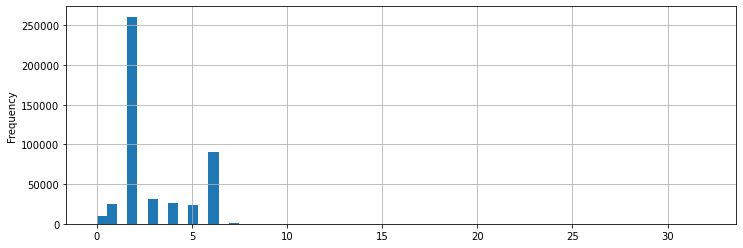

In [31]:
# Histograma para ver la frecuencia de cada valor.
df['ase_antig_an'].plot(kind='hist', bins=60, grid=True, figsize=[12,4])

In [32]:
# Otra forma de ver la frecuencia de cada valor.
df.groupby('ase_antig_an')['ase_antig_an'].count()

ase_antig_an
0       9634
1      25447
2     260999
3      31726
4      26022
5      23089
6      90970
7       1345
8         26
9        106
21         4
32         2
Name: ase_antig_an, dtype: int64

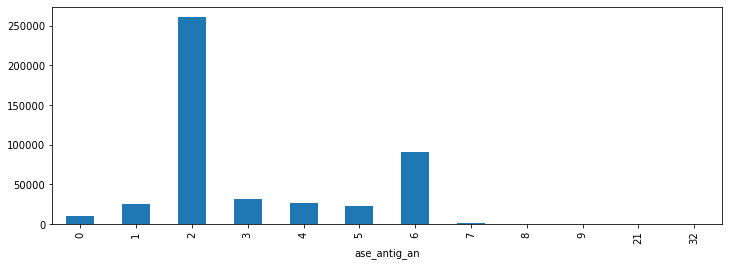

In [33]:
# Otra forma de ver la frecuencia de cada valor.
df.groupby('ase_antig_an')['ase_antig_an'].count().plot.bar(figsize=[12,4])
plt.show()

### Variable 'ase_nac' y 'ase_codnac'

In [34]:
df['ase_nac'].describe()

count        469370
unique            7
top       ARGENTINA
freq         467255
Name: ase_nac, dtype: object

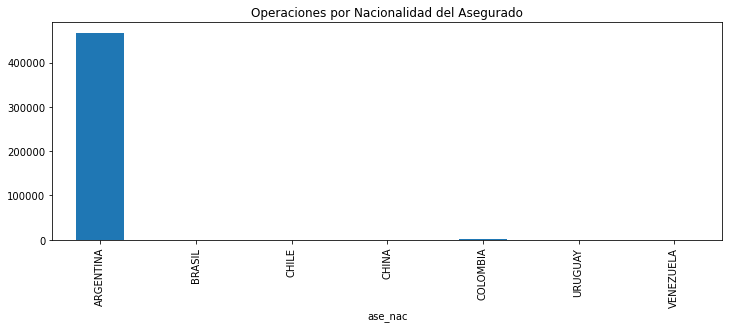

In [35]:
# Veo la frecuencia de cada valor.
df.groupby('ase_nac')['ase_nac'].count().plot.bar(figsize=[12,4])
plt.title('Operaciones por Nacionalidad del Asegurado')
plt.show()

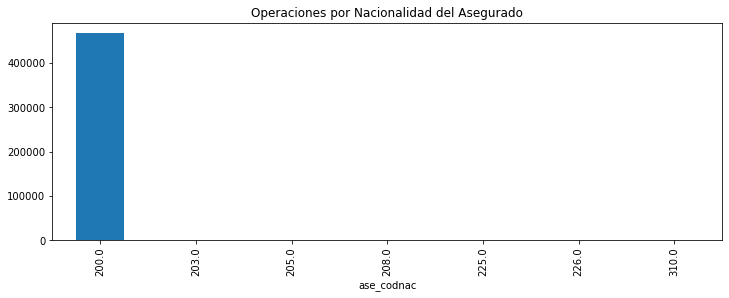

In [36]:
# Veo la frecuencia de cada valor.
df.groupby('ase_codnac')['ase_codnac'].count().plot.bar(figsize=[12,4])
plt.title('Operaciones por Nacionalidad del Asegurado')
plt.show()

In [37]:
# Reviso la frecuencia de cada valor.
df.groupby('ase_nac')['ase_nac'].count()

ase_nac
ARGENTINA    467255
BRASIL          327
CHILE           263
CHINA             2
COLOMBIA       1406
URUGUAY         114
VENEZUELA         3
Name: ase_nac, dtype: int64

In [38]:
# Reviso la frecuencia de cada valor.
df.groupby('ase_codnac')['ase_codnac'].count()

ase_codnac
200.0    467255
203.0       327
205.0      1406
208.0       263
225.0       114
226.0         3
310.0         2
Name: ase_codnac, dtype: int64

### Variable 'pro_antig_an'

In [39]:
df['pro_antig_an'].describe()

count    469370.000000
mean          9.708938
std           2.256888
min           4.000000
25%          10.000000
50%          11.000000
75%          11.000000
max          12.000000
Name: pro_antig_an, dtype: float64

<AxesSubplot:title={'center':'Antiguedad del Productor en Años'}>

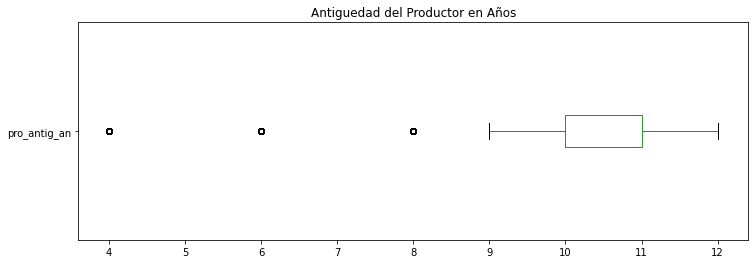

In [40]:
df['pro_antig_an'].plot(title='Antiguedad del Productor en Años', kind='box', vert=False, figsize=[12, 4])

In [41]:
df.groupby('pro_antig_an')['pro_antig_an'].count()

pro_antig_an
4      12936
6     100050
8       1531
9       1916
10     11660
11    336376
12      4901
Name: pro_antig_an, dtype: int64

### Variable 'tipveh'

In [42]:
df['tipveh'].describe()

count    469370.000000
mean          1.907193
std           1.178078
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           9.000000
Name: tipveh, dtype: float64

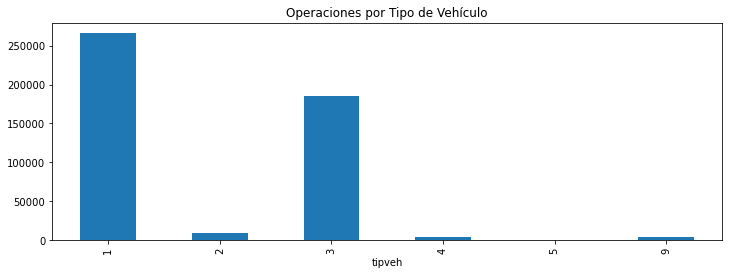

In [43]:
# Veo la frecuencia de cada valor.
df.groupby('tipveh')['tipveh'].count().plot.bar(figsize=[12,4])
plt.title('Operaciones por Tipo de Vehículo')
plt.show()

In [44]:
df.groupby('tipveh')['tipveh'].count()

tipveh
1    265652
2      9151
3    185840
4      4946
5        27
9      3754
Name: tipveh, dtype: int64

### Variable 'marca'

In [45]:
df['marca'].describe()

count    469370.000000
mean         37.424358
std          20.413349
min           2.000000
25%          25.000000
50%          26.000000
75%          57.000000
max          78.000000
Name: marca, dtype: float64

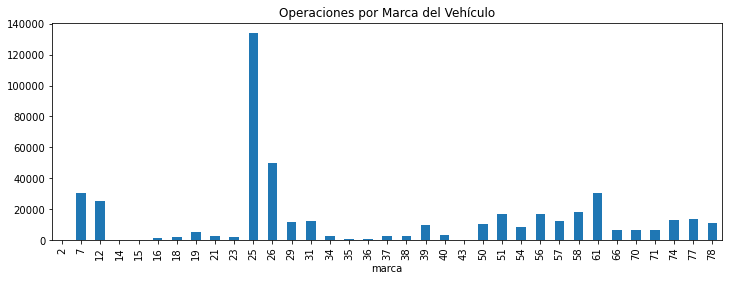

In [46]:
# Veo la frecuencia de cada valor.
df.groupby('marca')['marca'].count().plot.bar(figsize=[12,4])
plt.title('Operaciones por Marca del Vehículo')
plt.show()

<AxesSubplot:title={'center':'Operaciones por Marca del Vehículo '}>

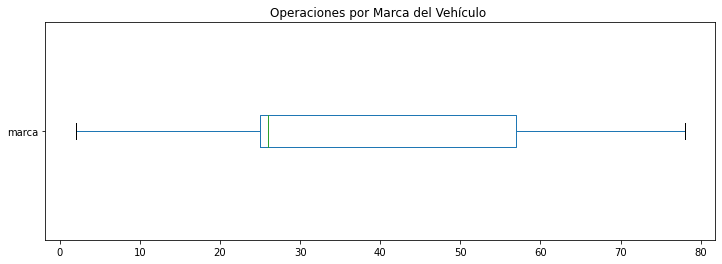

In [47]:
df['marca'].plot(title='Operaciones por Marca del Vehículo ', kind='box', vert=False, figsize=[12, 4])

In [48]:
df.groupby('marca')['marca'].count()

marca
2        166
7      30312
12     25597
14        28
15        46
16      1110
18      2113
19      4961
21      2525
23      2036
25    134085
26     49958
29     11466
31     12055
34      2447
35       851
36       889
37      2450
38      2913
39      9938
40      3466
43         2
50     10081
51     16747
54      8289
56     16932
57     12614
58     18065
61     30701
66      6600
70      6193
71      6216
74     12899
77     13416
78     11203
Name: marca, dtype: int64

### Variable 'modelo'

In [49]:
df['modelo'].describe()

count    469370.000000
mean        434.674807
std         261.009605
min           7.000000
25%         268.000000
50%         304.000000
75%         658.000000
max        1000.000000
Name: modelo, dtype: float64

<AxesSubplot:title={'center':'Operaciones por Modelo del Vehículo '}>

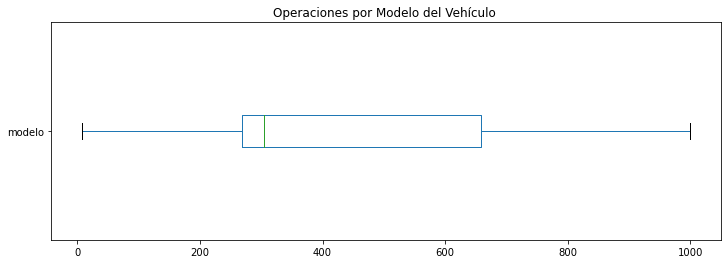

In [50]:
df['modelo'].plot(title='Operaciones por Modelo del Vehículo ', kind='box', vert=False, figsize=[12, 4])

In [51]:
df.groupby('modelo')['modelo'].count()

modelo
7         166
74      30312
102      1659
103      1696
104      1781
        ...  
996       415
997       452
998       413
999       420
1000      435
Name: modelo, Length: 587, dtype: int64

### Variable 'anio'

In [52]:
df['anio'].describe()

count    469370.000000
mean       2000.566114
std           7.087862
min        1990.000000
25%        1995.000000
50%        2000.000000
75%        2004.000000
max        2018.000000
Name: anio, dtype: float64

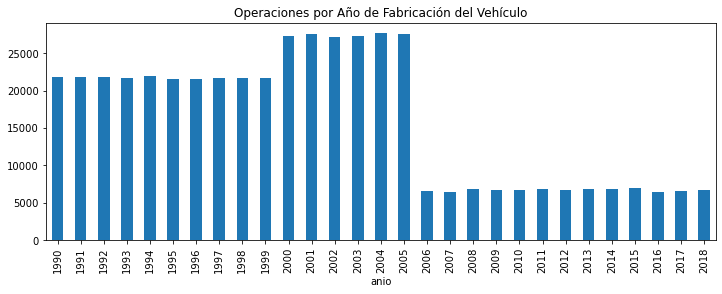

In [53]:
# Veo la frecuencia de cada valor.
df.groupby('anio')['anio'].count().plot.bar(figsize=[12,4])
plt.title('Operaciones por Año de Fabricación del Vehículo')
plt.show()

In [54]:
df.groupby('anio')['anio'].count()

anio
1990    21787
1991    21799
1992    21876
1993    21663
1994    21963
1995    21595
1996    21548
1997    21712
1998    21740
1999    21727
2000    27311
2001    27581
2002    27148
2003    27261
2004    27682
2005    27515
2006     6567
2007     6423
2008     6856
2009     6763
2010     6766
2011     6827
2012     6712
2013     6903
2014     6888
2015     6977
2016     6468
2017     6557
2018     6755
Name: anio, dtype: int64

In [55]:
### Variable 'uso'

In [56]:
df['uso'].describe()

count    469370.000000
mean          1.211358
std           0.766356
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: uso, dtype: float64

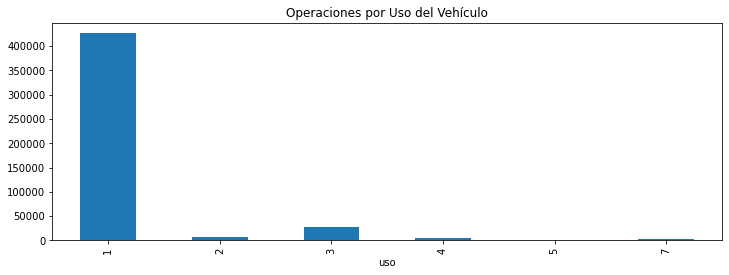

In [57]:
# Veo la frecuencia de cada valor.
df.groupby('uso')['uso'].count().plot.bar(figsize=[12,4])
plt.title('Operaciones por Uso del Vehículo')
plt.show()

In [58]:
df.groupby('uso')['uso'].count()

uso
1    426447
2      6509
3     27846
4      4776
5        38
7      3754
Name: uso, dtype: int64

### Variable 'cober'

In [59]:
df['cober'].describe()

count     469370
unique         8
top           B 
freq      146285
Name: cober, dtype: object

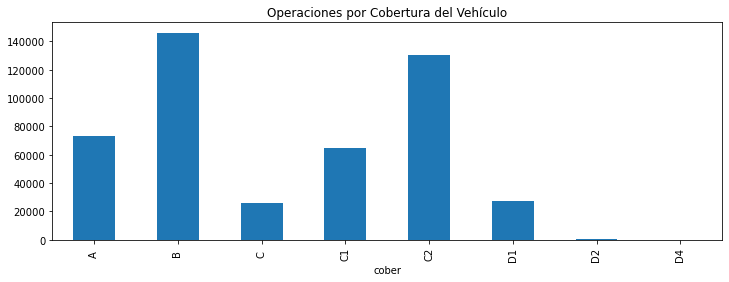

In [60]:
# Veo la frecuencia de cada valor.
df.groupby('cober')['cober'].count().plot.bar(figsize=[12,4])
plt.title('Operaciones por Cobertura del Vehículo')
plt.show()

In [61]:
df.groupby('cober')['cober'].count()

cober
A      73483
B     146285
C      26017
C1     65076
C2    130747
D1     27594
D2       128
D4        40
Name: cober, dtype: int64

### Variable 'cob_fecuma'

In [62]:
df['cob_fecuma'].describe()

count       451613
unique         615
top       1/5/2018
freq          1623
Name: cob_fecuma, dtype: object

In [63]:
df.groupby('cob_fecuma')['cob_fecuma'].count()

cob_fecuma
1/1/2018      291
1/1/2019      938
1/10/2018    1405
1/10/2019       1
1/11/2018    1184
             ... 
9/5/2019       34
9/6/2018     1295
9/7/2018     1177
9/8/2018     1245
9/9/2018     1230
Name: cob_fecuma, Length: 615, dtype: int64

In [64]:
df['cob_fecuma'].str.slice(6, 10).value_counts(dropna=False) # Registros por Año.

018     241947
18       86056
2018     77910
019      29169
NaN      17757
19       16411
2019       120
Name: cob_fecuma, dtype: int64

In [65]:
df.dtypes

pol               int64
endoso            int64
item              int64
fecemi           object
tipend           object
idaseg            int64
ase_antig_an      int64
ase_cp            int64
ase_codnac      float64
ase_nac          object
idprod            int64
pro_antig_an      int64
tipveh            int64
marca             int64
modelo            int64
anio              int64
uso               int64
uso_desc         object
cober            object
codcober          int64
cober_desc       object
cob_fecuma       object
cob_ef           object
fraude            int64
dtype: object

In [66]:
# Ordena la variable como 'texto', mezcla el 2018 con el 2019. Para facilitar el operar de ser necesario por esta columna
# Se convierte la variable a formato yyyymmdd. 

# A los NA les asigno 01/01/1800 para evitar problemas de manejo
df.cob_fecuma.fillna('1800-01-01', inplace=True)

pd.options.mode.chained_assignment = None  # default='warn'

# df['cob_fecuma'] = pd.to_numeric(pd.to_datetime(df['cob_fecuma']).dt.strftime('%Y%m%d'))
df['cob_fecuma'] = pd.to_datetime(df['cob_fecuma']).dt.strftime('%Y%m%d')

In [67]:
df['cob_fecuma'].dtypes

dtype('O')

In [68]:
df.groupby('cob_fecuma')['cob_fecuma'].count()

cob_fecuma
18000101    17757
20180101      291
20180102      366
20180103     1365
20180104     1246
            ...  
20191215        1
20191216        2
20191217        2
20191218        3
20191221        2
Name: cob_fecuma, Length: 616, dtype: int64

### Variable 'fecemi'

In [69]:
# Se convierte la variable a formato yyyymmdd.
df['fecemi'] = pd.to_datetime(df['fecemi']).dt.strftime('%Y%m%d')

### Variable 'cob_ef'

In [70]:
# Encoding variable 'cob_ef'
df['cob_ef'] = df['cob_ef'].map( {'N':0,'S':1} )

In [71]:
df.groupby('cob_ef')['cob_ef'].count()

cob_ef
0    262146
1    207224
Name: cob_ef, dtype: int64

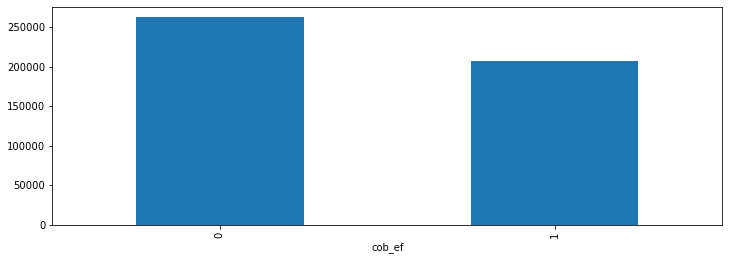

In [72]:
# Veo la frecuencia de cada valor.
df.groupby('cob_ef')['cob_ef'].count().plot.bar(figsize=[12,4])
plt.show()

### Variable 'fraude'

In [73]:
df.groupby('fraude')['fraude'].count()

fraude
0    452134
1     17236
Name: fraude, dtype: int64

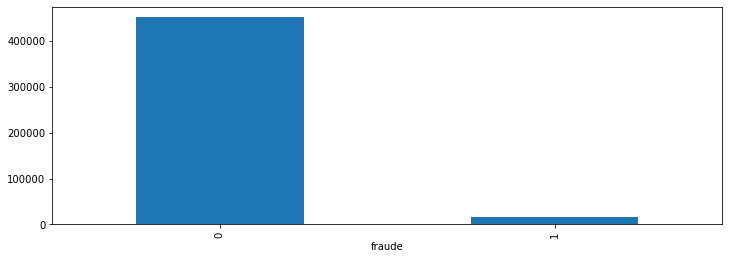

In [74]:
# Veo la frecuencia de cada valor.
df.groupby('fraude')['fraude'].count().plot.bar(figsize=[12,4])
plt.show()

## Análisis exploratorio multivariable.

In [75]:
# Me permitirá ver que variables están más relacionadas con 'fraude'.
# Pandas df.corr() is used to find the pairwise correlation of all columns in the dataframe. Any NA values are automatically
# excluded. For any non-numeric data type columns in the dataframe it is ignored.
matriz_corr=df.corr(method='pearson').round(2)
# .style.background_gradient()
matriz_corr

,pol,endoso,item,idaseg,ase_antig_an,ase_cp,ase_codnac,idprod,pro_antig_an,tipveh,marca,modelo,anio,uso,codcober,cob_ef,fraude
pol,1.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.04,-0.00,-0.00,0.00,-0.04,-0.00,-0.07,-0.10
endoso,0.00,1.00,-0.00,-0.00,0.01,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.01,0.00,-0.00,-0.02,-0.00
item,0.00,-0.00,1.00,-0.00,0.00,-0.00,-0.00,-0.01,0.01,0.01,0.00,0.00,-0.02,0.00,0.01,-0.01,0.00
idaseg,0.00,-0.00,-0.00,1.00,-0.21,0.01,-0.05,-0.06,0.05,0.01,0.00,0.00,-0.00,0.01,0.00,0.00,0.02
ase_antig_an,-0.00,0.01,0.00,-0.21,1.00,0.16,0.07,0.30,-0.25,-0.03,-0.03,-0.03,0.03,-0.01,-0.00,0.01,-0.10
ase_cp,-0.00,-0.00,-0.00,0.01,0.16,1.00,0.01,0.08,-0.07,-0.01,-0.03,-0.03,0.04,0.02,-0.01,0.02,-0.01
ase_codnac,0.00,-0.00,-0.00,-0.05,0.07,0.01,1.00,0.04,-0.03,-0.00,-0.00,-0.00,0.01,-0.00,-0.00,0.00,-0.01
idprod,-0.00,0.00,-0.01,-0.06,0.30,0.08,0.04,1.00,-0.77,-0.05,-0.03,-0.03,0.08,-0.01,-0.08,0.03,-0.02
pro_antig_an,0.00,-0.00,0.01,0.05,-0.25,-0.07,-0.03,-0.77,1.00,0.04,0.03,0.03,-0.06,0.01,0.07,-0.03,0.02
tipveh,-0.04,-0.00,0.01,0.01,-0.03,-0.01,-0.00,-0.05,0.04,1.00,0.08,0.08,-0.51,0.32,0.57,0.00,-0.07


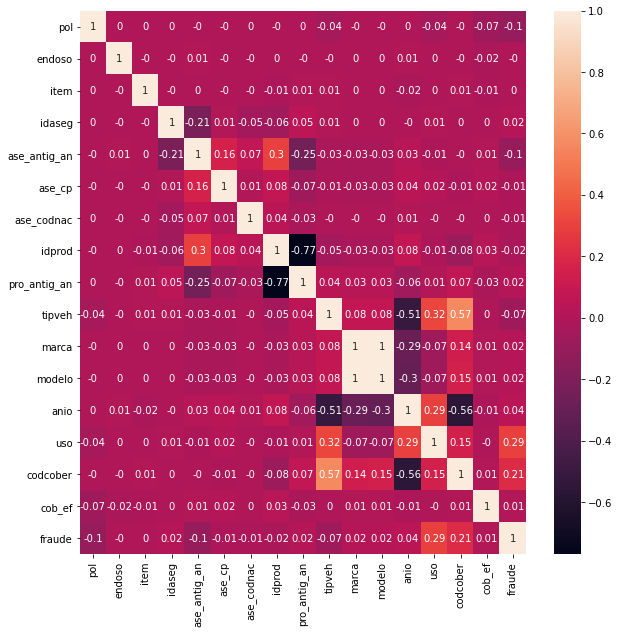

In [79]:
# fig, ax = plt.subplots(figsize=[10, 10])
sns.heatmap(data=matriz_corr, annot=True)
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469370 entries, 0 to 469369
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pol           469370 non-null  int64  
 1   endoso        469370 non-null  int64  
 2   item          469370 non-null  int64  
 3   fecemi        469370 non-null  object 
 4   tipend        469370 non-null  object 
 5   idaseg        469370 non-null  int64  
 6   ase_antig_an  469370 non-null  int64  
 7   ase_cp        469370 non-null  int64  
 8   ase_codnac    469370 non-null  float64
 9   ase_nac       469370 non-null  object 
 10  idprod        469370 non-null  int64  
 11  pro_antig_an  469370 non-null  int64  
 12  tipveh        469370 non-null  int64  
 13  marca         469370 non-null  int64  
 14  modelo        469370 non-null  int64  
 15  anio          469370 non-null  int64  
 16  uso           469370 non-null  int64  
 17  uso_desc      469370 non-null  object 
 18  cobe

In [78]:
df.to_csv('data_df.csv', header=True, index=False)